In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df  = pd.read_csv(r"C:\Users\vivek\Downloads\Tata\Student_Dropout_Dataset.csv")
print(f"Dataset Shape:" , {df.shape})
df.head()

Dataset Shape: {(1000, 14)}


,student_id,age,gender,parent_edu,lunch,test_prep,studytime,failures,absences,math_score,reading_score,writing_score,avg_score,dropout_risk
0,1,21,Male,NaN,Free/Reduced,Completed,2,1,5.0,29,98,0,42.333333,0
1,2,18,Female,Higher,Free/Reduced,NaN,1,0,7.0,98,90,59,82.333333,0
2,3,19,Male,Secondary,Free/Reduced,NaN,4,0,1.0,21,26,91,46.000000,0
3,4,21,Male,Primary,Standard,NaN,2,0,1.0,42,7,56,35.000000,1
4,5,17,Male,Secondary,Standard,Completed,4,2,13.0,26,31,2,19.666667,1


In [3]:
# Cleaning the data 
df.info()
df.isnull().sum()

df.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     1000 non-null   int64  
 1   age            1000 non-null   int64  
 2   gender         1000 non-null   object 
 3   parent_edu     891 non-null    object 
 4   lunch          1000 non-null   object 
 5   test_prep      412 non-null    object 
 6   studytime      1000 non-null   int64  
 7   failures       1000 non-null   int64  
 8   absences       1000 non-null   float64
 9   math_score     1000 non-null   int64  
 10  reading_score  1000 non-null   int64  
 11  writing_score  1000 non-null   int64  
 12  avg_score      1000 non-null   float64
 13  dropout_risk   1000 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 109.5+ KB


,student_id,age,gender,parent_edu,lunch,test_prep,studytime,failures,absences,math_score,reading_score,writing_score,avg_score,dropout_risk
count,1000.000000,1000.0000,1000,891,1000,412,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,2,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,Secondary,Standard,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,519,416,693,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,17.9600,NaN,NaN,NaN,NaN,2.497000,0.508000,5.177000,50.898000,49.460000,49.174000,49.844000,0.345000
std,288.819436,2.0036,NaN,NaN,NaN,NaN,1.118589,0.690226,4.217281,28.953478,28.936443,29.296655,17.088505,0.475606
min,1.000000,15.0000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.666667,0.000000
25%,250.750000,16.0000,NaN,NaN,NaN,NaN,1.000000,0.000000,2.000000,27.000000,24.000000,23.000000,38.333333,0.000000
50%,500.500000,18.0000,NaN,NaN,NaN,NaN,3.000000,0.000000,5.000000,52.000000,51.000000,48.000000,50.666667,0.000000
75%,750.250000,20.0000,NaN,NaN,NaN,NaN,3.000000,1.000000,8.000000,76.000000,74.000000,75.000000,61.333333,1.000000


In [4]:
# Now preparing the data 
# Seperate numerical  and categorical columns 
num_col = df.select_dtypes(include= ["int64",'float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns
#Now Filling the numerical coloums based on skewness 
for col in num_col:
    skew_val = df[col].skew()
    if skew_val > 1 or skew_val < -1 :
        df[col].fillna(df[col].median(),inplace = True) #  skewed -- > Median 
    else:
        df[col].fillna(df[col].mean(),inplace = True)   #normal ---> mean
#Now Filling the categorical coloums with mode 
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace = True)


In [5]:
#Encoding categorical. val.

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

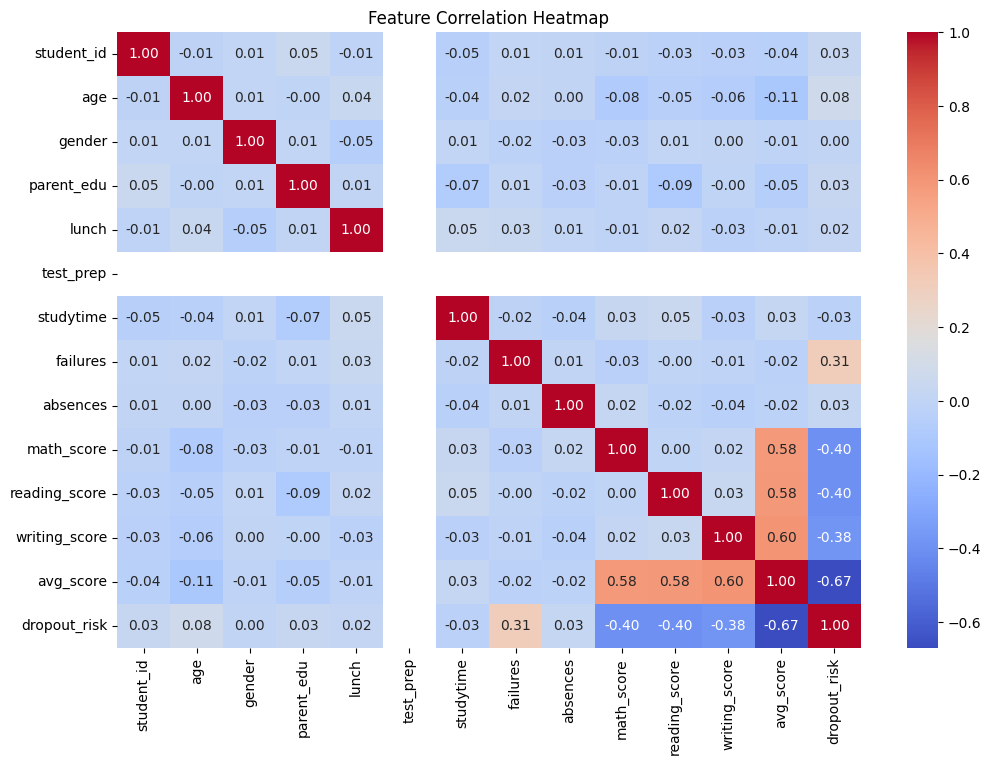

In [6]:
# Correlation heatmap 
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, fmt = '.2f' , cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Spliting the features and target 
X = df.drop(['dropout_risk', 'student_id'], axis = 1)
y = df['dropout_risk']


In [8]:
# Train - Test Split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Feature Scaling 
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
#now from logistic regresssion 
# training the model 
log_reg = LogisticRegression(multi_class='multinomial', solver="lbfgs", max_iter=2000, random_state= 42)
log_reg.fit(X_train, y_train)

# predictions 
y_pred = log_reg.predict(X_test)

In [11]:
# Evauation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:" , confusion_matrix(y_test, y_pred))
print("Classcation Report: \n", classification_report(y_test, y_pred))

# Cross-Validation or dev 
cv_score = cross_val_score(log_reg,X,y,cv = 5 )
print("Cross_Validation Accuracy:", np.round(cv_score.mean(), 4 ))

Accuracy: 0.865
Confusion matrix: [[120  15]
 [ 12  53]]
Classcation Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       135
           1       0.78      0.82      0.80        65

    accuracy                           0.86       200
   macro avg       0.84      0.85      0.85       200
weighted avg       0.87      0.86      0.87       200

Cross_Validation Accuracy: 0.883


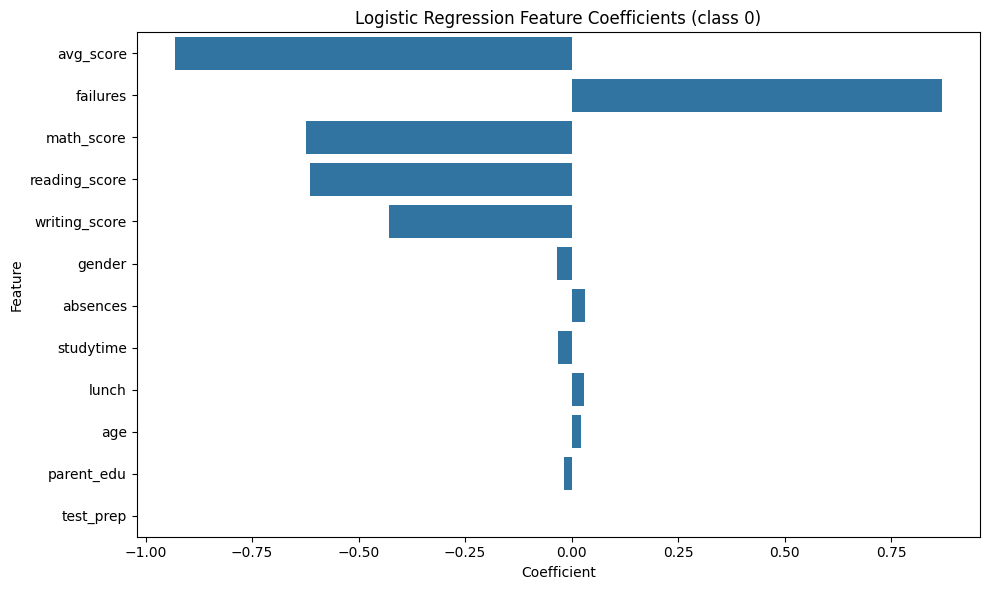

In [12]:
#feature importance plot 
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0] 
})

coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title("Logistic Regression Feature Coefficients (class 0)")
plt.tight_layout()
plt.show()